In [1]:
import cv2
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import pylab as pl
from sklearn.metrics import confusion_matrix,accuracy_score
import pydicom
from tqdm import tqdm
import pandas as pd
from matplotlib import pyplot as plt
import os
import time
import numpy as np
import cv2
import numpy as np

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train

,Unnamed: 0,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath
0,0,E:/dataset/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
1,1,E:/dataset/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
2,2,E:/dataset/train\train\1000\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.57792439353439709695...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
3,3,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
4,4,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
...,...,...,...,...,...,...,...,...
1683,1733,E:/dataset/train\train\996\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.88201401328037140717...,10,Hip,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
1684,1734,E:/dataset/train\train\996\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.88978469234834814481...,15,Pelvis,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
1685,1735,E:/dataset/train\train\997\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.33303514480609398517...,2,Cervical Spine,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
1686,1736,E:/dataset/train\train\997\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.13310561881659972417...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...


In [4]:
for i in range(len(train)):
    t=train.Imagepath[i]
    y=t.split('\\')
    # y
    z="D:/DATASET/TrainingImages/" + y[1]

    train.Imagepath[i]=z
    
train.head(5)

C:\Users\kaush\AppData\Local\Temp/ipykernel_9960/347223484.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Imagepath[i]=z


,Unnamed: 0,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath
0,0,E:/dataset/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
1,1,E:/dataset/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
2,2,E:/dataset/train\train\1000\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.57792439353439709695...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
3,3,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
4,4,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....


In [5]:
from sklearn.model_selection import train_test_split   
y = train.Label
X = train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50, stratify = X['Label'])

In [6]:
y_train.value_counts()

Chest                              652
Others                             108
Knee                                92
Abdomen                             72
Cervical Spine                      69
Feet                                63
Pelvis                              60
Wrist                               57
Lumbar Spine and Thoracic Spine     40
Hand and Wrist                      38
Ankle                               37
Shoulder                            36
Lumbar Spine                        35
Hand                                28
Sinus                               21
Elbow                               21
Hip                                 17
Lower Leg                           17
Finger                              13
Thoracic Spine                      13
Forearm                             11
Abdomen and Chest                   10
Skull                                9
Name: Label, dtype: int64

In [7]:
X_train.Label.value_counts()

Chest                              652
Others                             108
Knee                                92
Abdomen                             72
Cervical Spine                      69
Feet                                63
Pelvis                              60
Wrist                               57
Lumbar Spine and Thoracic Spine     40
Hand and Wrist                      38
Ankle                               37
Shoulder                            36
Lumbar Spine                        35
Hand                                28
Sinus                               21
Elbow                               21
Hip                                 17
Lower Leg                           17
Finger                              13
Thoracic Spine                      13
Forearm                             11
Abdomen and Chest                   10
Skull                                9
Name: Label, dtype: int64

In [8]:
X_test.Label.value_counts()

Chest                              72
Others                             12
Knee                               10
Abdomen                             8
Cervical Spine                      8
Feet                                7
Pelvis                              7
Wrist                               6
Lumbar Spine and Thoracic Spine     5
Lumbar Spine                        4
Hand and Wrist                      4
Shoulder                            4
Ankle                               4
Hand                                3
Sinus                               2
Elbow                               2
Thoracic Spine                      2
Hip                                 2
Lower Leg                           2
Finger                              2
Skull                               1
Forearm                             1
Abdomen and Chest                   1
Name: Label, dtype: int64

In [9]:
X_test

,Unnamed: 0,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath
1449,1493,E:/dataset/train\train\81\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.32160902359476426830...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
1645,1695,E:/dataset/train\train\956\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12465380284035593782...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
559,572,E:/dataset/train\train\1370\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.15092989485256748181...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
362,371,E:/dataset/train\train\1254\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.36121912364078781887...,14,Others,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
1237,1275,E:/dataset/train\train\643\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.85495648454557212778...,6,Feet,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
...,...,...,...,...,...,...,...,...
1558,1603,E:/dataset/train\train\886\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12657778303933552316...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
1131,1166,E:/dataset/train\train\554\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.79789803969602271722...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
148,151,E:/dataset/train\train\1115\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.10645552878898750123...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
62,62,E:/dataset/train\train\104\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.72558621588625374076...,0,Abdomen,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....


In [10]:
X_train = X_train.sort_index(ascending=True)
X_train

,Unnamed: 0,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath
0,0,E:/dataset/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
1,1,E:/dataset/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
2,2,E:/dataset/train\train\1000\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.57792439353439709695...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
3,3,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
4,4,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
...,...,...,...,...,...,...,...,...
1682,1732,E:/dataset/train\train\994\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.73111358555919845078...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
1683,1733,E:/dataset/train\train\996\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.88201401328037140717...,10,Hip,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
1685,1735,E:/dataset/train\train\997\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.33303514480609398517...,2,Cervical Spine,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
1686,1736,E:/dataset/train\train\997\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.13310561881659972417...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....


In [11]:
y_train = y_train.sort_index(ascending=True)
y_train

0                Chest
1                Chest
2                Chest
3                Chest
4                Chest
             ...      
1682             Chest
1683               Hip
1685    Cervical Spine
1686             Chest
1687            Pelvis
Name: Label, Length: 1519, dtype: object

In [12]:
X_test = X_test.sort_index(ascending=True)
X_test

,Unnamed: 0,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath
6,6,E:/dataset/train\train\1005\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.75243637122822422802...,9 21,Hand and Wrist,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
20,20,E:/dataset/train\train\1016\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12961416485268413761...,21,Wrist,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
29,29,E:/dataset/train\train\1025\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.99227641053114131427...,11,Knee,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
37,37,E:/dataset/train\train\1026\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.72908203752062511272...,11,Knee,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
40,40,E:/dataset/train\train\1028\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.59409306263004590952...,21,Wrist,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
...,...,...,...,...,...,...,...,...
1643,1693,E:/dataset/train\train\955\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.46995447179630810082...,13 20,Lumbar Spine and Thoracic Spine,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
1645,1695,E:/dataset/train\train\956\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12465380284035593782...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
1661,1711,E:/dataset/train\train\970\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.11142749741335643457...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
1665,1715,E:/dataset/train\train\973\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.20287656812819582539...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....


In [13]:
y_test = y_test.sort_index(ascending=True)
y_test

6                        Hand and Wrist
20                                Wrist
29                                 Knee
37                                 Knee
40                                Wrist
                     ...               
1643    Lumbar Spine and Thoracic Spine
1645                              Chest
1661                              Chest
1665                              Chest
1684                             Pelvis
Name: Label, Length: 169, dtype: object

In [14]:
y=set(X_train.Label)

In [15]:
y=list(y)

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)

LabelEncoder()

In [17]:
z=le.transform(X_train.Label)

In [18]:
X_train['enum']=z

In [19]:
len(X_train)

1519

In [20]:
X_train.head(10)

,Unnamed: 0,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath,enum
0,0,E:/dataset/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,4
1,1,E:/dataset/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,4
2,2,E:/dataset/train\train\1000\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.57792439353439709695...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,4
3,3,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,4
4,4,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,4
5,5,E:/dataset/train\train\1004\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.47572155867413808436...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,4
7,7,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.15916540756113733490...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,4
8,8,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.18487623914375706231...,2,Cervical Spine,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,3
9,9,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.78401161739580676973...,15,Pelvis,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,17
10,10,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.86102441993547934252...,11,Knee,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,12


In [21]:
X_train = X_train.reset_index()
X_train.head(10)

,index,Unnamed: 0,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath,enum
0,0,0,E:/dataset/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,4
1,1,1,E:/dataset/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,4
2,2,2,E:/dataset/train\train\1000\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.57792439353439709695...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,4
3,3,3,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,4
4,4,4,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,4
5,5,5,E:/dataset/train\train\1004\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.47572155867413808436...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,4
6,7,7,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.15916540756113733490...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,4
7,8,8,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.18487623914375706231...,2,Cervical Spine,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,3
8,9,9,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.78401161739580676973...,15,Pelvis,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,17
9,10,10,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.86102441993547934252...,11,Knee,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,12


In [22]:
X_train.head(10)

,index,Unnamed: 0,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath,enum
0,0,0,E:/dataset/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,4
1,1,1,E:/dataset/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,4
2,2,2,E:/dataset/train\train\1000\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.57792439353439709695...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,4
3,3,3,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,4
4,4,4,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,4
5,5,5,E:/dataset/train\train\1004\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.47572155867413808436...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,4
6,7,7,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.15916540756113733490...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,4
7,8,8,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.18487623914375706231...,2,Cervical Spine,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,3
8,9,9,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.78401161739580676973...,15,Pelvis,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,17
9,10,10,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.86102441993547934252...,11,Knee,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,12


In [23]:
y_train = y_train.reset_index()
y_train.drop(['index'], axis = 1, inplace = True)
y_train.head(10)

,Label
0,Chest
1,Chest
2,Chest
3,Chest
4,Chest
5,Chest
6,Chest
7,Cervical Spine
8,Pelvis
9,Knee


In [24]:
X_test = X_test.reset_index()
X_test.drop(['index'], axis = 1, inplace = True)
X_test.head(10)

,Unnamed: 0,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath
0,6,E:/dataset/train\train\1005\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.75243637122822422802...,9 21,Hand and Wrist,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
1,20,E:/dataset/train\train\1016\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12961416485268413761...,21,Wrist,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
2,29,E:/dataset/train\train\1025\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.99227641053114131427...,11,Knee,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
3,37,E:/dataset/train\train\1026\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.72908203752062511272...,11,Knee,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
4,40,E:/dataset/train\train\1028\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.59409306263004590952...,21,Wrist,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
5,42,E:/dataset/train\train\1032\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.59175237101901597342...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
6,45,E:/dataset/train\train\1032\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.50936077508977170899...,13 20,Lumbar Spine and Thoracic Spine,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
7,62,E:/dataset/train\train\104\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.72558621588625374076...,0,Abdomen,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
8,65,E:/dataset/train\train\1041\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.78092589205812056556...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....
9,86,E:/dataset/train\train\1055\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.49042641191949792629...,0,Abdomen,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....


In [25]:
y_test = y_test.reset_index()
y_test.drop(['index'], axis = 1, inplace = True)
y_test.head(10)

,Label
0,Hand and Wrist
1,Wrist
2,Knee
3,Knee
4,Wrist
5,Chest
6,Lumbar Spine and Thoracic Spine
7,Abdomen
8,Chest
9,Abdomen


In [26]:
d = []

In [27]:
for i in range(len(X_train)):
    d.append(((X_train.Imagepath[i],int(X_train.enum[i]))))
    

In [28]:
type(z)

numpy.ndarray

In [29]:
X_train.enum

0        4
1        4
2        4
3        4
4        4
        ..
1514     4
1515    11
1516     3
1517     4
1518    17
Name: enum, Length: 1519, dtype: int32

In [30]:
d

[('D:/DATASET/TrainingImages/1.2.826.0.1.3680043.8.498.65452424240994805812717428674475343109.png',
  4),
 ('D:/DATASET/TrainingImages/1.2.826.0.1.3680043.8.498.29960944389705651248668522443366935719.png',
  4),
 ('D:/DATASET/TrainingImages/1.2.826.0.1.3680043.8.498.57792439353439709695715592578627325770.png',
  4),
 ('D:/DATASET/TrainingImages/1.2.826.0.1.3680043.8.498.37634180084111795685928688942145555908.png',
  4),
 ('D:/DATASET/TrainingImages/1.2.826.0.1.3680043.8.498.12781870272366327239431992873991536152.png',
  4),
 ('D:/DATASET/TrainingImages/1.2.826.0.1.3680043.8.498.47572155867413808436639828301877907300.png',
  4),
 ('D:/DATASET/TrainingImages/1.2.826.0.1.3680043.8.498.15916540756113733490766234439378064771.png',
  4),
 ('D:/DATASET/TrainingImages/1.2.826.0.1.3680043.8.498.18487623914375706231172360173248146829.png',
  3),
 ('D:/DATASET/TrainingImages/1.2.826.0.1.3680043.8.498.78401161739580676973623271087262413160.png',
  17),
 ('D:/DATASET/TrainingImages/1.2.826.0.1.3680

In [31]:
X_train.head()

,index,Unnamed: 0,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath,enum
0,0,0,E:/dataset/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,4
1,1,1,E:/dataset/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,4
2,2,2,E:/dataset/train\train\1000\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.57792439353439709695...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,4
3,3,3,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,4
4,4,4,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,4


In [32]:
X_train.Imagepath[1]

'D:/DATASET/TrainingImages/1.2.826.0.1.3680043.8.498.29960944389705651248668522443366935719.png'

In [33]:
y = le.transform(X_test.Label)

In [34]:
y

array([10, 22, 12, 12, 22,  4, 15,  0,  4,  0,  0, 18,  3,  4,  4,  4,  0,
        4,  4,  4, 17,  4, 13,  4, 13, 16, 17,  4,  4,  2,  2, 12, 12, 18,
       16, 17,  4,  7, 14,  4, 19,  4, 19, 11,  0,  4,  4,  4,  4,  3,  4,
        4,  4,  4,  4,  7, 22, 12, 21, 21,  4,  0,  9, 11,  4,  4, 16,  4,
        5,  4,  4,  3,  6, 16,  4,  4, 12,  4, 12, 14, 16,  4, 15,  4,  4,
        3, 15,  3,  4, 16,  9, 17, 12,  4,  3, 16,  4, 22,  6,  6,  4,  5,
        4, 12, 18,  4,  4,  4, 14, 18,  4, 10,  4,  4,  4,  8,  4, 14,  2,
       16,  9,  4,  6,  4,  4,  3, 17, 16, 12,  6,  1, 20, 10,  4,  4,  3,
        4, 10, 15,  4, 16, 16,  4, 22,  4, 22,  4,  4,  4,  4,  4,  0,  4,
        4, 16,  6,  4, 17,  2,  4,  0,  4,  4,  6, 15,  4,  4,  4, 17])

In [35]:
X_test["enum"] = y

In [36]:
X_test

,Unnamed: 0,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath,enum
0,6,E:/dataset/train\train\1005\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.75243637122822422802...,9 21,Hand and Wrist,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,10
1,20,E:/dataset/train\train\1016\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12961416485268413761...,21,Wrist,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,22
2,29,E:/dataset/train\train\1025\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.99227641053114131427...,11,Knee,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,12
3,37,E:/dataset/train\train\1026\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.72908203752062511272...,11,Knee,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,12
4,40,E:/dataset/train\train\1028\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.59409306263004590952...,21,Wrist,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,22
...,...,...,...,...,...,...,...,...,...
164,1693,E:/dataset/train\train\955\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.46995447179630810082...,13 20,Lumbar Spine and Thoracic Spine,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,15
165,1695,E:/dataset/train\train\956\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12465380284035593782...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,4
166,1711,E:/dataset/train\train\970\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.11142749741335643457...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,4
167,1715,E:/dataset/train\train\973\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.20287656812819582539...,3,Chest,D:/DATASET/TrainingImages/1.2.826.0.1.3680043....,4


In [37]:
c = []
for i in range(len(X_test)):
    c.append(((X_test.Imagepath[i],int(X_test.enum[i]))))
    
c 

[('D:/DATASET/TrainingImages/1.2.826.0.1.3680043.8.498.75243637122822422802803455060201037925.png',
  10),
 ('D:/DATASET/TrainingImages/1.2.826.0.1.3680043.8.498.12961416485268413761806036241048442495.png',
  22),
 ('D:/DATASET/TrainingImages/1.2.826.0.1.3680043.8.498.99227641053114131427351369098512621609.png',
  12),
 ('D:/DATASET/TrainingImages/1.2.826.0.1.3680043.8.498.72908203752062511272415279481353711219.png',
  12),
 ('D:/DATASET/TrainingImages/1.2.826.0.1.3680043.8.498.59409306263004590952837909835388739702.png',
  22),
 ('D:/DATASET/TrainingImages/1.2.826.0.1.3680043.8.498.59175237101901597342696020015488943651.png',
  4),
 ('D:/DATASET/TrainingImages/1.2.826.0.1.3680043.8.498.50936077508977170899728065708413429534.png',
  15),
 ('D:/DATASET/TrainingImages/1.2.826.0.1.3680043.8.498.72558621588625374076289057954754895994.png',
  0),
 ('D:/DATASET/TrainingImages/1.2.826.0.1.3680043.8.498.78092589205812056556071639089171997738.png',
  4),
 ('D:/DATASET/TrainingImages/1.2.826.0.1

In [38]:
image_paths, y_train = zip(*d)
image_paths_test, y_test = zip(*c)

In [39]:
des_list=[]

In [40]:
orb=cv2.ORB_create()

In [41]:
im=cv2.imread(image_paths[1])

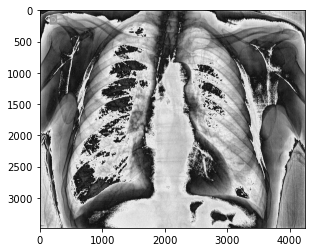

In [42]:
plt.imshow(im)

In [43]:
def draw_keypoints(vis, keypoints, color = (0, 255, 255)):
    for kp in keypoints:
            x, y = kp.pt
            plt.imshow(cv2.circle(vis, (int(x), int(y)), 2, color))

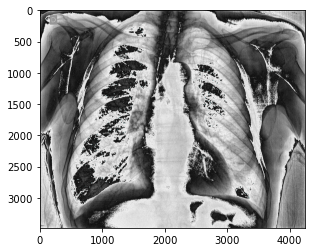

In [44]:
kp = orb.detect(im,None)
kp, des = orb.compute(im, kp)
img=draw_keypoints(im,kp)

In [45]:
for image_pat in image_paths:
    im=cv2.imread(image_pat)
    kp=orb.detect(im,None)
    keypoints,descriptor= orb.compute(im, kp)
    des_list.append((image_pat,descriptor))

In [46]:
descriptors=des_list[0][1]
for image_path,descriptor in des_list[1:]:
    descriptors=np.vstack((descriptors,descriptor))

In [47]:
descriptors.shape

(756773, 32)

In [48]:
descriptors_float=descriptors.astype(float)

In [49]:
from scipy.cluster.vq import kmeans,vq

In [50]:
k=200
voc,variance=kmeans(descriptors_float,k,1)

In [51]:
im_features=np.zeros((len(image_paths),k),"float32")
for i in range(len(image_paths)):
    words,distance=vq(des_list[i][1],voc)
    for w in words:
        im_features[i][w]+=1

In [52]:
from sklearn.preprocessing import StandardScaler
stdslr=StandardScaler().fit(im_features)
im_features=stdslr.transform(im_features)

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(im_features,np.array(y_train))

RandomForestClassifier()

In [76]:
des_list_test=[]

In [67]:
for image_pat in image_paths_test:
    image=cv2.imread(image_pat)
    kp=orb.detect(image,None)
    keypoints_test,descriptor_test= orb.compute(image, kp)
    des_list_test.append((image_pat,descriptor_test))

In [68]:
from scipy.cluster.vq import vq
test_features=np.zeros((len(image_paths_test),k),"float32")
for i in range(len(image_paths_test)):
    words,distance=vq(des_list_test[i][1],voc)
    for w in words:
        test_features[i][w]+=1

In [69]:
test_features

array([[0., 1., 1., ..., 6., 2., 3.],
       [2., 0., 4., ..., 2., 1., 3.],
       [3., 0., 0., ..., 4., 0., 2.],
       ...,
       [2., 0., 2., ..., 3., 1., 2.],
       [4., 2., 2., ..., 1., 0., 6.],
       [3., 2., 0., ..., 2., 4., 8.]], dtype=float32)

In [70]:
test_features=stdslr.transform(test_features)

In [71]:
y_test

(10,
 22,
 12,
 12,
 22,
 4,
 15,
 0,
 4,
 0,
 0,
 18,
 3,
 4,
 4,
 4,
 0,
 4,
 4,
 4,
 17,
 4,
 13,
 4,
 13,
 16,
 17,
 4,
 4,
 2,
 2,
 12,
 12,
 18,
 16,
 17,
 4,
 7,
 14,
 4,
 19,
 4,
 19,
 11,
 0,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 7,
 22,
 12,
 21,
 21,
 4,
 0,
 9,
 11,
 4,
 4,
 16,
 4,
 5,
 4,
 4,
 3,
 6,
 16,
 4,
 4,
 12,
 4,
 12,
 14,
 16,
 4,
 15,
 4,
 4,
 3,
 15,
 3,
 4,
 16,
 9,
 17,
 12,
 4,
 3,
 16,
 4,
 22,
 6,
 6,
 4,
 5,
 4,
 12,
 18,
 4,
 4,
 4,
 14,
 18,
 4,
 10,
 4,
 4,
 4,
 8,
 4,
 14,
 2,
 16,
 9,
 4,
 6,
 4,
 4,
 3,
 17,
 16,
 12,
 6,
 1,
 20,
 10,
 4,
 4,
 3,
 4,
 10,
 15,
 4,
 16,
 16,
 4,
 22,
 4,
 22,
 4,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 16,
 6,
 4,
 17,
 2,
 4,
 0,
 4,
 4,
 6,
 15,
 4,
 4,
 4,
 17)

In [100]:
y_pred=clf.predict(test_features)

In [101]:
y_pred

array([ 4,  4,  4, 12,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4, 16,  4,  4,  4,  4,
        4,  4,  4,  4, 10,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4, 16, 16,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4])

In [102]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.44970414201183434


In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         8
           4       0.44      1.00      0.61        72
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         2
          12       1.00      0.10      0.18        10
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         5
          16       1.00      0.25      0.40        12
          17       0.00    

C:\Users\kaush\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kaush\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kaush\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
